In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [205]:
# Load Data into a Dataframe Excel
#Question 1: Launch a new python notebook and read the data set. EDA & Pre-processing
df = pd.read_csv("cars-dataset.csv")

In [206]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [207]:
#Actual data laded
df.shape

(398, 8)

In [208]:
#Filtered Data
# hp columnhas some invalid charecters, so drop the rows where there are invalid charecters 
df_filtered = df[df["hp"] != "?"]
df_filtered.shape

(392, 8)

In [209]:
# hp column is not a numeric value, so convert that to a numeric value

df_filtered["hp"] = df_filtered["hp"].astype('float64')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [210]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


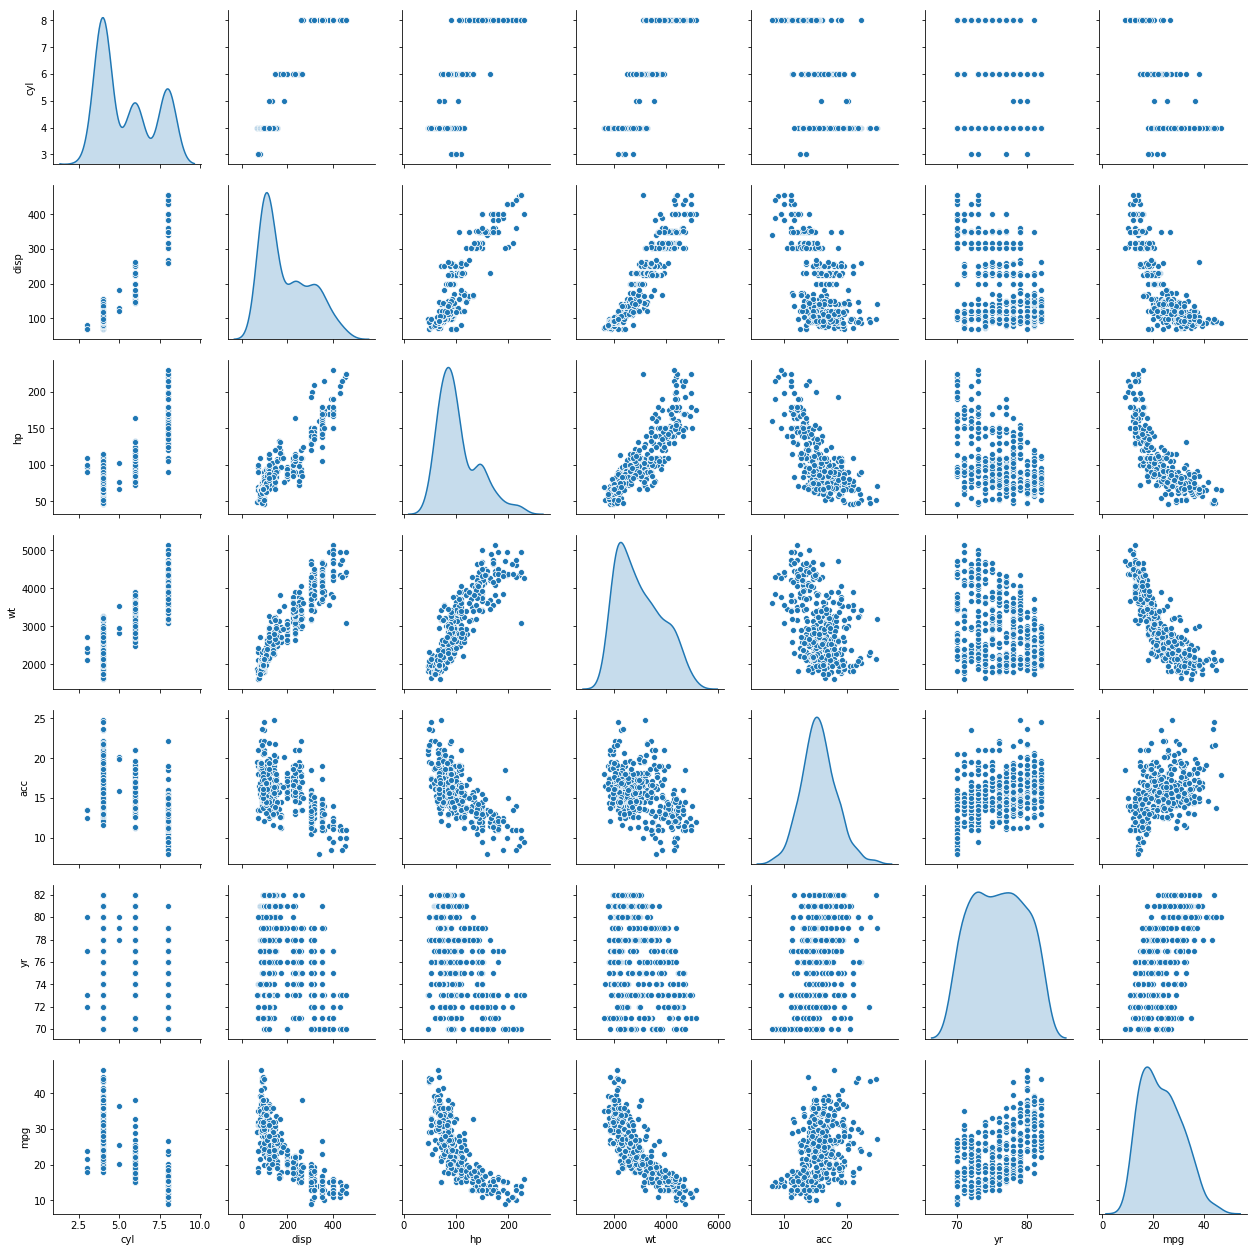

In [211]:
# Question: 2 Use pair plot or scatter matrix to visualize how the different variables are related
sns.pairplot(df_filtered, diag_kind="kde")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


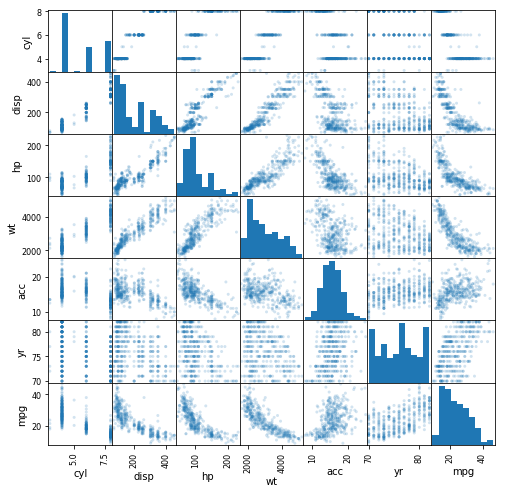

In [212]:
#Scatter matix
pd.scatter_matrix(df_filtered, alpha=0.2, figsize=(8, 8))
plt.show()

In [213]:
#Question: 3 Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. 
# Identify and separate the clusters

# df_filtered = df_filtered.drop(["car name"],axis=1)
# df_carname = 
# df_filtered.head()

X = df_filtered.drop(["car name"],axis=1)
y = df_filtered["car name"]

In [214]:
X.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [215]:
cluster_range = range( 2, 8)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,7.292105e+07
1,3,3.384903e+07
2,4,1.881093e+07
3,5,1.349745e+07
4,6,1.015097e+07
5,7,7.561122e+06


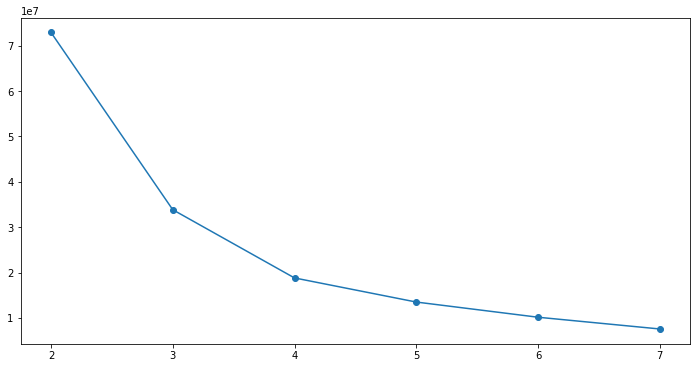

In [216]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [217]:
print("# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters")


# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters


In [218]:
# Apply ZScore
from scipy.stats import zscore

# Drop year coloumn
df_filtered_z = X.apply(zscore)
df_filtered_z.pop('yr')

array = df_filtered_z.values
# array

In [219]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df_filtered_z)
# df_filtered_z_copy = df_filtered_z.copy(deep = True)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [220]:
# Fidn the centroids
centroids = cluster.cluster_centers_
centroids

array([[ 1.47184414,  1.46979213,  1.49145953,  1.37493755, -1.05253303,
        -1.14393843],
       [-0.86110766, -0.81098162, -0.6843036 , -0.79514908,  0.36356374,
         0.76382895],
       [ 0.33521362,  0.22847796, -0.06927147,  0.29302334,  0.30812718,
        -0.46592926]])

In [221]:
prediction=cluster.predict(df_filtered_z)
# prediction
df_filtered_z["GROUP"] = prediction
# df_filtered_z

In [222]:
df_filtered_z_group = df_filtered_z.join(y)


In [223]:
df_filtered_z_group.head()

,cyl,disp,hp,wt,acc,mpg,GROUP,car name
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-0.698638,0,chevrolet chevelle malibu
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.083498,0,buick skylark 320
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.698638,0,plymouth satellite
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.955212,0,amc rebel sst
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.826925,0,ford torino


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210C228A748>,
      dtype=object)

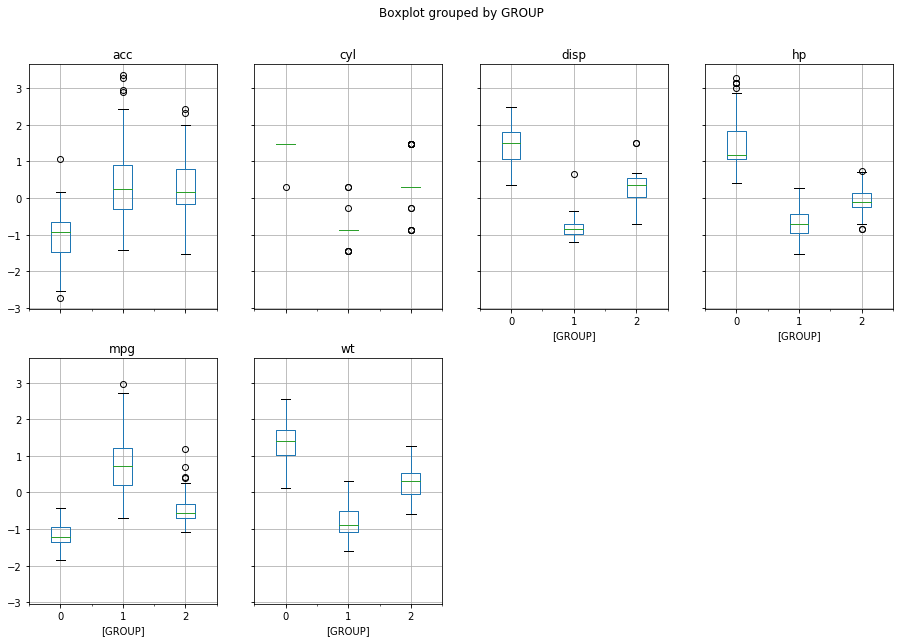

In [224]:
import matplotlib.pylab as plt

df_filtered_z_group.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [225]:
# sns.lmplot( 'car name', 'GROUP', data=df_filtered_z_group, hue = "GROUP", fit_reg=False, size = 5 )

In [226]:
# cols = df_filtered_z.columns
# cols

In [227]:
# Use linear regression model on different clusters separately and print the coefficients of the models individually

